In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [7]:
from google.colab import files


uploaded = files.upload()


Saving youtube_shorts_tiktok_trends_2025.csv_ML.csv to youtube_shorts_tiktok_trends_2025.csv_ML.csv


In [8]:
import pandas as pd

df = pd.read_csv("youtube_shorts_tiktok_trends_2025.csv_ML.csv")
print(df.shape)
df.head()


(50000, 32)


,trend_label,platform,region,language,category,traffic_source,device_brand,creator_tier,title_len,text_richness,...,share_hashtag_interaction,platform_cat,region_cat,language_cat,category_cat,traffic_source_cat,device_brand_cat,creator_tier_cat,richness_traffic_interaction,weekend_hashtag_boost
0,stable,youtube,Africa,es,Food,search,samsung,nano,2,1.999998,...,0.056675,1,0,3,3,4,5,3,9.999990,0
1,stable,youtube,Europe,it,Comedy,feed,apple,micro,2,1.999998,...,0.092987,1,3,6,1,1,0,1,3.999996,0
2,stable,tiktok,Americas,en,Tech,search,google,micro,2,1.999998,...,0.064086,0,1,2,9,4,1,1,9.999990,0
3,rising,tiktok,Americas,ar,Comedy,feed,huawei,mid,2,1.999998,...,0.182443,0,1,0,1,1,2,2,3.999996,0
4,stable,tiktok,Americas,pt,Beauty,search,apple,nano,2,1.999998,...,0.098327,0,1,9,0,4,0,3,9.999990,0


In [9]:
df = df.dropna(subset=['trend_label'])

In [10]:
# Encode target
le = LabelEncoder()
df['trend_label'] = le.fit_transform(df['trend_label'])

In [11]:
# Separate features & target
X = df.drop(columns=['trend_label'])
y = df['trend_label']

In [12]:
# Convert categorical columns to dummy vars
X = pd.get_dummies(X, drop_first=True)

print("Features shape:", X.shape)
print("Target distribution:\n", y.value_counts())

Features shape: (50000, 65)
Target distribution:
 trend_label
3    27696
1    12500
0     5098
2     4706
Name: count, dtype: int64


In [13]:
# STEP 4: Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [14]:
# STEP 5: Train Random Forest model
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    random_state=42,
    class_weight="balanced"
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=200,
                       random_state=42)

In [15]:
# After training, before fitting the model
X = pd.get_dummies(X)
training_columns = X.columns

# Save them for later
import joblib
joblib.dump(training_columns, "training_columns.pkl")


['training_columns.pkl']

In [16]:
# STEP 6: Evaluate
y_pred = rf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

   declining       0.68      0.84      0.75      1020
      rising       0.76      0.76      0.76      2500
    seasonal       0.84      0.69      0.76       941
      stable       0.86      0.85      0.86      5539

    accuracy                           0.81     10000
   macro avg       0.79      0.79      0.78     10000
weighted avg       0.82      0.81      0.81     10000

Accuracy: 0.813


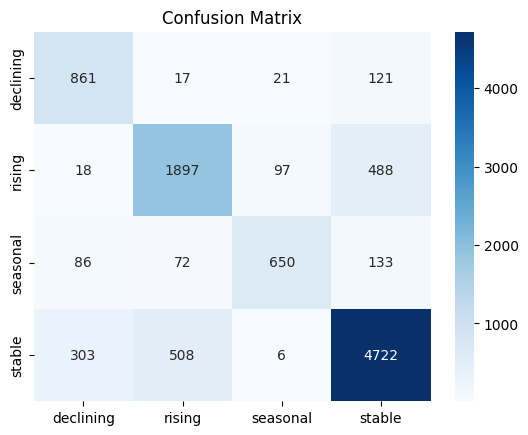

In [17]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.show()

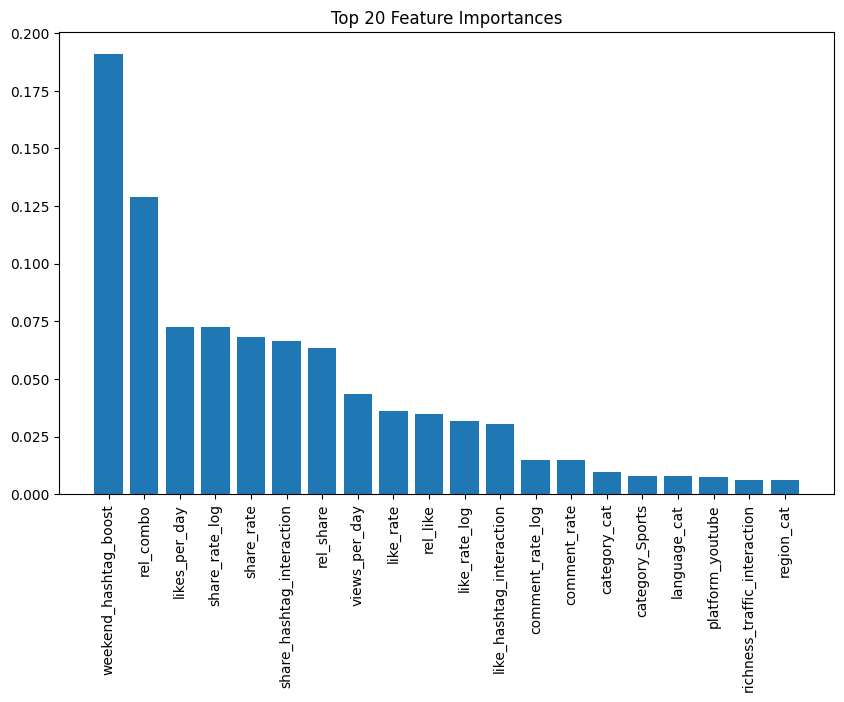

In [18]:
# STEP 7: Feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Top 20 Feature Importances")
plt.bar(range(20), importances[indices[:20]], align="center")
plt.xticks(range(20), [X.columns[i] for i in indices[:20]], rotation=90)
plt.show()

In [23]:
import joblib
joblib.dump(rf, "virality_model.pkl")
joblib.dump(list(X.columns), "training_columns.pkl")


['training_columns.pkl']

In [20]:
!ls -lh


total 127M
drwxr-xr-x 1 root root 4.0K Sep  9 13:46 sample_data
-rw-r--r-- 1 root root 1.6K Sep 16 16:52 training_columns.pkl
-rw-r--r-- 1 root root 110M Sep 16 16:52 virality_model.pkl
-rw-r--r-- 1 root root  18M Sep 16 16:42 youtube_shorts_tiktok_trends_2025.csv_ML.csv


In [26]:
from google.colab import files
files.download("training_columns.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>